In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

## Linear Regression (regression), Logistic Regression (classification)

- Linear regression (regression)
- Logistic regression (classification)

## Never ever forget !!!

- Parametrized models
<br>
Machine learning models (more than 90%) are parametrized functions
$$
f: X \to Y
$$
with parameters $\mathcal{W} = (W^1, W^2, \dots, W^L)$ and $\mathcal{b} = (b^1, b^2, \dots, b^L)$
<br>
We can consider this models as:
$$
f: \mathcal{W} \times \mathcal{b} \times X \to Y
$$
<br>
- Data sample (training / validation / test set) from population:
Then we have sample of our data 
$$
X = (X^1, X^2, \dots, X^m)
$$ 
from entire population along with labels $Y = (y^1, y^2, \dots, y^m)$ and we train on this data
- Training process:
Define loss function:
$$
L(f(x), y)
$$
where $y$ adre labels
<br>
We fix our data sample as constants $X = (X^1, X^2, \dots, X^m)$, define cost function as aggregation of loss functions over our data sample:
$$
C : \mathcal{W} \to \mathbb{R}^1
$$
such that:
$$
C(W, b) = \text{aggr}_{i=1}^m(L(f(X^i, W, b,  y)))
$$
For instance aggregate with mean:
$$
C(W, b) = \frac{1}{m}\sum_{i=1}^m(L(f(X^i, W, b, y)))
$$
<br>
- Training:
$$
\min_{W \in \mathcal{W}, b\in \mathcal{b}}C(W, b)
$$
Make the cost $C$ as small as possible for $W$ and $b$, or find $W$ and $b$ for which $C$ is as small as possible



## Example - linear model

Consider linear function $f:\mathbb{R}^n \to \mathbb{R}^1$:
$$
f(x) = \sum_{i=1}^{n}{x_i \cdot w_i} + b
$$
or:
$$
f(x) = W \cdot X + b
$$
<br>

where
$$
x = (x_1, x_2, \dots, x_n)
$$
and
$$
W = (w_1, w_2, \dots, w_n)
$$
<br>

For labels $y = (y^{(1)}, y^{(2)}, \dots, y^{(m)})$ we can create the loss function:
$$
L(W, b, X, y) = ||f(W, X) - y||^2 
$$
and cost for examples $(X^{(1)}, X^{(2)}, \dots, X^{(m)})$ and $(y^{(1)}, y^{(2)}, \dots, y^{(m)})$ where $X^{(k)} = (x_1^{(k)}, x_2^{(k)}, \dots, x_n^{(k)})$ and $y^{(k)} \in \mathbb{R}^1$:
$$
C(W, b) = \frac{1}{2 \cdot m}\sum_{i=1}^{m}||f(W, x^{(i)}) - y^{(i)}||^2 = \frac{1}{2 \cdot m}\sum_{i=1}^{m}(f(W, x^{(i)}) - y^{(i)})^2
$$

On the ther hand we can consider $(X^{(1)}, X^{(2)}, \dots, X^{(m)})$ as a matrix:
$$
X = \begin{pmatrix}
x_1^{(1)} & x_2^{(1)} & \dots & x_n^{(1)}\\
x_1^{(2)} & x_2^{(2)} & \dots & x_n^{(2)}\\
\dots \\
x_1^{m} & x_2^{m} & \dots & x_n^{m}\\
\end{pmatrix}
$$
<br>

or
$$
X^T = \begin{pmatrix}
x_1^{(1)} & x_1^{(2)} & \dots & x_1^{(m)}\\
x_2^{(1)} & x_2^{(2)} & \dots & x_2^{(m)}\\
\dots \\
x_n^{(1)} & x_n^{(2)} & \dots & x_n^{(m)}\\
\end{pmatrix}
$$

So We have $X \in \mathbb{R}^{m \times n}$ and $W \in \mathbb{R}^n$ and we can map $W \in \mathbb{R}^{n \times 1}$ and we can write:
$$
W^T \in \mathbb{R}^{n \times 1}
$$
<br>

and
$$
X \cdot W^T \in \mathbb{R}^{m \times 1}
$$
<br>

We can write our model for multiply elements simultaneously:
$$
f(X) = X \cdot W^T + (b, b, \dots, b)^T
$$
<br>

or in brief
$$
f(X) = X \cdot W^T + b
$$
<br>

Using broadcasting

In [2]:
! pip install -U numpy
! pip install -U pandas
! pip install -U scikit-learn
! pip install -U matplotlib
! pip install -U seaborn

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
class Linear(object):
    """Linear regression model"""
    
    def __init__(self, W:np.ndarray, b:float):
        self.W = W
        self.b = b
        self.dl_W = None
        self.dl_b = None
        
    def forward(self, X:np.ndarray) -> np.ndarray:
        return X @ self.W.T + self.b
    
    
    def loss(self, X:np.ndarray, y:np.ndarray) -> np.ndarray:
        y_pred = self.forward(X)
        lss = y_pred - y
        
        return lss
    
    def cost(self, X:np.ndarray, y:np.ndarray) -> float:
        lss = self.loss(X, y)
        cs = (1.0 / (2.0 * len(X))) * np.sum(lss**2)
    
        return cs
    
    def gradient(self, X:np.ndarray, y:np.ndarray):
        lss = self.loss(X, y)
        coef = 1.0 / len(X)
        self.dl_W = coef * np.sum(X * lss, axis=0)
        self.dl_b = coef * np.sum(lss, axis=0)
    
        return self.dl_W, self.dl_b
    
    @property
    def grad_W(self) -> np.ndarray:
        return self.dl_W
    
    @property
    def grad_b(self) -> np.ndarray:
        return self.dl_b
    
    def update(self, lr:float):
        self.W = self.W - (lr * self.dl_W)
        self.b = self.b - (lr * self.dl_b)
    
    def __call__(self, *args, **kwargs):
        return self.forward(*args, **kwargs)
    

In [5]:
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]], dtype=float)
W = np.array([[0.1, 0.2]], dtype=float)
b = 4.0
print(f'{X.shape=} {W.shape=}, {W.T.shape}')

X.shape=(4, 2) W.shape=(1, 2), (2, 1)


In [6]:
y_d = X @ W.T + b
linear = Linear(W, b)
y_l = linear(X)
print(f'{y_d.shape=}, {y_l.shape=}')
print(f'{y_d=}')
print(f'{y_l=}')
print(f'{y_d==y_l=}')

y_d.shape=(4, 1), y_l.shape=(4, 1)
y_d=array([[4.5],
       [5.1],
       [5.7],
       [6.3]])
y_l=array([[4.5],
       [5.1],
       [5.7],
       [6.3]])
y_d==y_l=array([[ True],
       [ True],
       [ True],
       [ True]])


Recall the chain rule for $f: \mathbb{R}^1 \to \mathbb{R}^1$ and $g: \mathbb{R}^1 \to \mathbb{R}^1$:
<br>
$$
(g \circ f)' = g'_f \cdot f'
$$
<br>

Or if we assign $f(x) = y$
$$
g(f(x))' = g(y)' \cdot f(x)'
$$

In our case, derivative of our cost function:
$$
C(W, b) = \frac{1}{2m}R(W, X^{(i)}, y)^2
$$
where
$$
R(W, X^{(i)}, y)^2 = ||f(W, x^{(i)}) - y^{(i)}||^2
$$
and herefore
<br>
$$
\frac{\partial C(W, b)}{\partial w_j} = \frac{1}{m}\sum_{i=1}^{m} \cdot ((R(W, X^{(i)}, y) \cdot X_j^{(i)}) = \frac{1}{m}\sum_{i=1}^{m} ( (f(X^{(i)}) - y^{(i)}) \cdot X_j^{(i)}) = \frac{1}{m}\sum_{i=1}^{m} (W^T \cdot X^{i} + b - y^{(i)}) \cdot X_j^{(i)}
$$
<br>

and
$$
\frac{\partial C(W, b)}{\partial b} = \frac{1}{m}\sum_{i=1}^{m} \cdot R(W, X^{(i)}, y) = \frac{1}{m}\sum_{i=1}^{m} (f(X^{(i)}) - y^{(i)}) = \frac{1}{m}\sum_{i=1}^{m} (W^T \cdot X^{i} + b - y^{(i)})
$$
and step by step descend to the exremum point:
$$
W_j = W_j - \alpha \cdot \frac{\partial C(y,x,w)}{\partial W_j}
$$
and
$$
b = b - \alpha \cdot \frac{\partial C(y,x,W)}{\partial b}
$$
<br>

Or in terms of vectors:
$$
W = W - \alpha \cdot \frac{\partial C(y,x,W)}{\partial W}
$$
and
$$
b = b - \alpha \cdot \frac{\partial C(y,x,W)}{\partial b}
$$
<br>
Where $\alpha$ is the step and is called **learning rate** for training and $\nabla_{W}C(y,x,W) = \frac{\partial C(y,x,W)}{\partial W}$ is gradient

In [7]:
y = np.array([[3.9, 4.1, 3.7, 5.8]]).T
print(f'{y.shape=}')
print(f'{y=}')
y_pred=linear(X)
print(f'{y_pred=}')
lss = linear(X) - y
print(f'{lss=}')
print(f'{X=}')
print(f'{X * lss=}')
coef = 1.0 / len(X)
dl_W = coef * np.sum(X * lss, axis=0)
print(f'{dl_W=}')
dl_b = coef * np.sum(lss, axis=0)
print(f'{dl_b=}')

y.shape=(4, 1)
y=array([[3.9],
       [4.1],
       [3.7],
       [5.8]])
y_pred=array([[4.5],
       [5.1],
       [5.7],
       [6.3]])
lss=array([[0.6],
       [1. ],
       [2. ],
       [0.5]])
X=array([[1., 2.],
       [3., 4.],
       [5., 6.],
       [7., 8.]])
X * lss=array([[ 0.6,  1.2],
       [ 3. ,  4. ],
       [10. , 12. ],
       [ 3.5,  4. ]])
dl_W=array([4.275, 5.3  ])
dl_b=array([1.025])


Broiadcasting in NumPy arrays which means for array: 
<br>
```python
X = np.array([5, 15, 25, 35, 45, 55])
W*X = np.array([W*5, W*15, W*25, W*35, W*45, W*55])
``` 
Standard vector scalar multiplication

In [8]:
class Trainer(object):
    """Linear regression model"""
    
    def __init__(self, model: callable, lr:float=0.001, n_iters:int=10, tl:int=10):
        self.model = model
        self.lr = lr
        self.n_iters = n_iters
        self.tl = tl

    def fit(self, X:np.ndarray, y:np.ndarray):
        cs = list()
        for i in range(self.n_iters):
            c = self.model.cost(X, y)
            cs.append(c)
            d_W, d_b = self.model.gradient(X, y)
            self.model.update(self.lr)
            if i % self.tl == 0:
                print(f'Gradients {self.model.grad_W=}, {self.model.grad_b=}')
                print(f'Interation {i} cost = {c}')
        self.y_preds = self.model(X)
        print(f'Iteration {i}: {W=} {b=}')

        return cs, self.y_preds
    
    def validate(self, X:np.ndarray, y:np.ndarray, mtype='classifier') -> float:
        y_pred = self.model(X)
        score = float(sum(y_pred == y)) / float(len(y))
        
        return score

## Prepare data

In [9]:
from sklearn.datasets import load_iris

In [10]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [11]:
X = iris['data']
y = iris['target']
print(f'{X.shape=}, {y.shape=}')
y = np.expand_dims(y, axis=1) if len(y.shape) < 2 else y
print(f'{X.shape=}, {y.shape=}')

X.shape=(150, 4), y.shape=(150,)
X.shape=(150, 4), y.shape=(150, 1)


#### Load as DataFrame in order to make it more understagable

In [12]:
iris_df = pd.DataFrame(data= iris.data, columns= iris.feature_names)
target_df = pd.DataFrame(data= iris.target, columns= ['species'])
def converter(specie):
    if specie == 0:
        return 'setosa'
    elif specie == 1:
        return 'versicolor'
    else:
        return 'virginica'
target_df['species'] = target_df['species'].apply(converter)
# Concatenate the DataFrames
iris_df = pd.concat([iris_df, target_df], axis= 1)
iris_df.head(86)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
81,5.5,2.4,3.7,1.0,versicolor
82,5.8,2.7,3.9,1.2,versicolor
83,6.0,2.7,5.1,1.6,versicolor
84,5.4,3.0,4.5,1.5,versicolor


In [13]:
iris_df.head(60)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


## Train the linear model

In [15]:
W_init = np.zeros((1, 4))
b_init = 0.0
W_init, b_init

(array([[0., 0., 0., 0.]]), 0.0)

In [16]:
model = Linear(W_init, b_init)
trainer = Trainer(model, lr=0.0001, n_iters=400000, tl=10000)
y_preds, cs = trainer.fit(X, y)

Gradients self.model.grad_W=array([-6.37066667, -2.906     , -5.12133333, -1.79266667]), self.model.grad_b=array([-1.])
Interation 0 cost = 0.8333333333333334
Gradients self.model.grad_W=array([ 0.03844531,  0.03890585, -0.07014823, -0.05477468]), self.model.grad_b=array([0.01170741])
Interation 10000 cost = 0.031392199374461416
Gradients self.model.grad_W=array([ 0.01329575, -0.00775922, -0.00649314, -0.02279944]), self.model.grad_b=array([0.00092103])
Interation 20000 cost = 0.02830789312492165
Gradients self.model.grad_W=array([ 0.00955248, -0.01221357,  0.0010629 , -0.0180234 ]), self.model.grad_b=array([-0.00042095])
Interation 30000 cost = 0.027665652325304425
Gradients self.model.grad_W=array([ 0.00840383, -0.01175753,  0.00197472, -0.01653627]), self.model.grad_b=array([-0.00063961])
Interation 40000 cost = 0.027140628060191387
Gradients self.model.grad_W=array([ 0.00761889, -0.01079854,  0.00209518, -0.01550333]), self.model.grad_b=array([-0.00072006])
Interation 50000 cost = 

In [22]:
def plot_data(*data:np.ndarray):
    plt.subplots(figsize=(15, 5))
    plt.plot(*data)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.show()
    plt.close()

In [21]:
cs = np.array(cs)

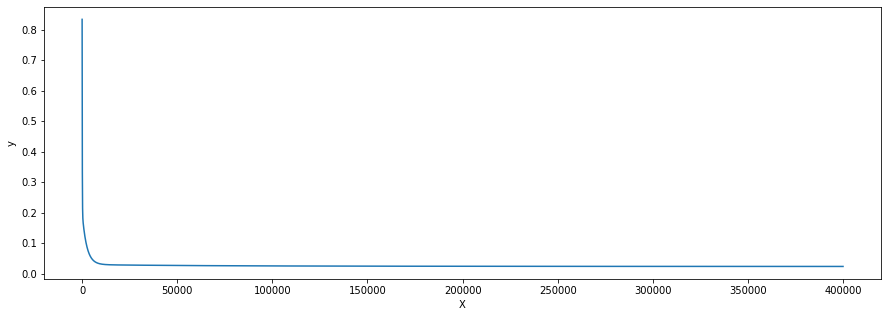

In [24]:
plot_data(cs)

## Logistic Regression (classification)

Consoder function:
$$
\sigma : \mathbb{R}^1 \to \mathbb{R}^1
$$
where:
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$
<br>

This function is called sigmopid
<br>

Let's investigate this function

In [25]:
def sigmoid(Z:np.ndarray) -> np.ndarray:
    return 1 / (1 + np.exp(-Z))

In [26]:
Z = np.linspace(-10, 10, num=86)
y = sigmoid(Z)
Z, y

(array([-10.        ,  -9.76470588,  -9.52941176,  -9.29411765,
         -9.05882353,  -8.82352941,  -8.58823529,  -8.35294118,
         -8.11764706,  -7.88235294,  -7.64705882,  -7.41176471,
         -7.17647059,  -6.94117647,  -6.70588235,  -6.47058824,
         -6.23529412,  -6.        ,  -5.76470588,  -5.52941176,
         -5.29411765,  -5.05882353,  -4.82352941,  -4.58823529,
         -4.35294118,  -4.11764706,  -3.88235294,  -3.64705882,
         -3.41176471,  -3.17647059,  -2.94117647,  -2.70588235,
         -2.47058824,  -2.23529412,  -2.        ,  -1.76470588,
         -1.52941176,  -1.29411765,  -1.05882353,  -0.82352941,
         -0.58823529,  -0.35294118,  -0.11764706,   0.11764706,
          0.35294118,   0.58823529,   0.82352941,   1.05882353,
          1.29411765,   1.52941176,   1.76470588,   2.        ,
          2.23529412,   2.47058824,   2.70588235,   2.94117647,
          3.17647059,   3.41176471,   3.64705882,   3.88235294,
          4.11764706,   4.35294118,   4.

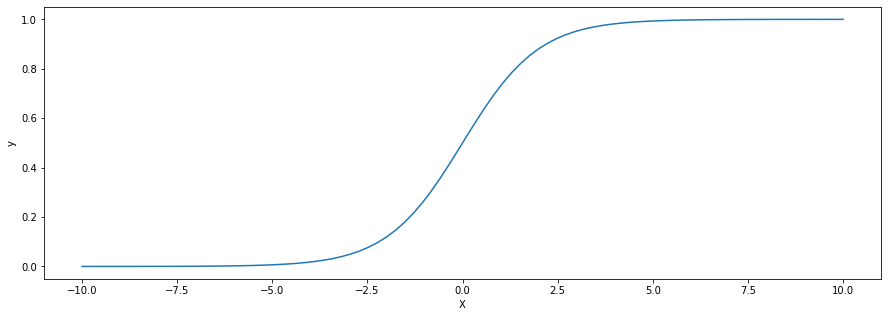

In [27]:
plot_data(Z, y)

Create a model $m : \mathbb{R}^n \to (0, 1)$ which will return:
$$
m = \sigma \circ f
$$
where
$$
f(X) = W \cdot X + b
$$
<br>

So
$$
m(X) = \sigma(W \cdot X + b)
$$
<br>

Composition of our linear model with **sigmoid** function
$$
m(X) = \frac{1}{1 + e^{-f(X)}}
$$
<br>

or
$$
m(X) = \frac{1}{1 + e^{-(W \cdot X + b)}}
$$
Which we call **Logistic regression** model

#### Binary classificarion and cross-entropy

Consider $y \in \{0, 1\}$ and our model should return something which will close to $y$ per appropriate $X$ value
<br>

Recall that sigmoid function values fall in $(0, 1)$ segment and we can put threshold (for instance $0.5$ by default) there:
$$
d(m(X)) = \begin{cases} 
      0 & m(X) \leq 0.5 \\
      1 & m(X) \gt 0.5 
   \end{cases}
$$
<br>

Or more general for threshold $t \in (0, 1)$ define:
$$
d(m(X)) = \begin{cases} 
      0 & m(X) \leq t \\
      1 & m(X) \gt t 
   \end{cases}
$$

What will happen if we make our threshold $t$ near $0$, near $1$?

In [28]:
Z = np.linspace(0, 1, num=86)
y = -np.log(Z + 1e-5)

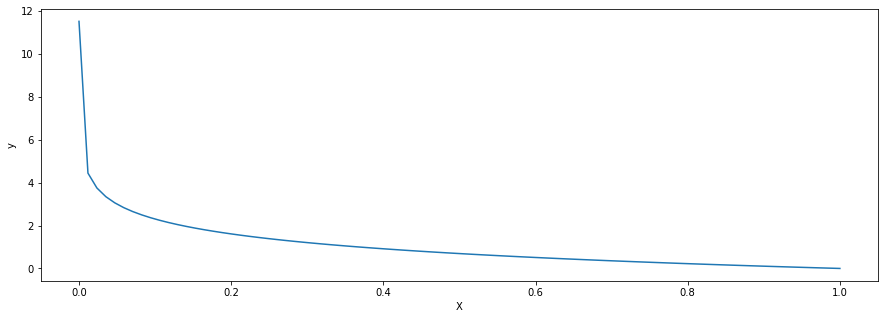

In [29]:
plot_data(Z, y)

For loss function we can define cross-entropy function (recall Shanon's entropy from information theory) which will fit our model provided distribution to the target distribution:
$$
l(X, y, W, b) = -(y \cdot \log(m(X)) + (1 - y) \cdot \log(1 - m(X))
$$
<br>

Or in general for two discret probability distributions $p$ and $q$:
$$
l(p, q) = -\sum_{i=1}^{n}p_i \cdot \log(q_i)
$$
<br>

In our case our target distribution is $\{0, 1\}$ and our model provides $\{m(X), 1 - m(X)\}$, because of nature of sigmoid function
<br>

When our label is $0$ loss will be $-\log(1 - m(X))$ and it will be minimal when $1$ which implies that $m(X)$ will converge to $0$ or to the label value
<br>

When our label is $1$ loss will be $-\log(m(X))$ and it will be minimal when $1$ which implies that $m(X)$ will converge to $1$ or to the label value
<br>

So we can define the cost function as we did before:
$$
C(X, y, W, b) = \frac{1}{m}\sum_{i=1}^{m}{l(X^{(i)}, y^{(i)}, W, b)} = -\frac{1}{m}\sum_{i=1}^{m}{(y^{(i)}\log(m(X^{(i)})) + (1 - y^{(i)})\log(1 - m(X^{(i)})))}
$$

#### Gradient of cross-entropy based cost function

1) Excersize:
<br>
Proove that for sigmoid:
$$
\sigma(z)' = \sigma(z) \cdot (1 - \sigma(z))
$$
<br>

2) Excersize:
<br>
Proove that for cross-entropy based cost function:
<br>
$$
\frac{\partial C(W, b)}{\partial w_j} = \frac{1}{m}\sum_{i=1}^{m} \cdot ((R(W, X^{(i)}, y) \cdot X_j^{(i)}) = \frac{1}{m}\sum_{i=1}^{m} ( (f(X^{(i)}) - y^{(i)}) \cdot X_j^{(i)}) = \frac{1}{m}\sum_{i=1}^{m} (\sigma(W^T \cdot X^{i} + b) - y^{(i)}) \cdot X_j^{(i)}
$$
<br>

and
$$
\frac{\partial C(W, b)}{\partial b} = \frac{1}{m}\sum_{i=1}^{m} \cdot R(W, X^{(i)}, y) = \frac{1}{m}\sum_{i=1}^{m} (f(X^{(i)}) - y^{(i)}) = \frac{1}{m}\sum_{i=1}^{m} (\sigma(W^T \cdot X^{i} + b) - y^{(i)})
$$
<br>

So the gradient calculation is similar to the **linear regression** model

In [ ]:
W = np.array([0.1, 0.2])
b = 4
X = np.array([1, 2])
Z = W @ X.T + b
print(f'{Z=}')
y_h = 1 / (1 + np.exp(-Z))
print(f'{y_h=}')
y_s = sigmoid(Z)
print(f'{y_s=}')
model = Logistic(W, b)
y_m = model(X)
print(f'{y_m=}')


In [30]:
from sklearn.datasets import make_classification

In [31]:
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)
y = np.expand_dims(y, axis=1)
print(f'{X.shape=} {y.shape=}')

X.shape=(500, 2) y.shape=(500, 1)


/Users/levan/anaconda3/envs/edu/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


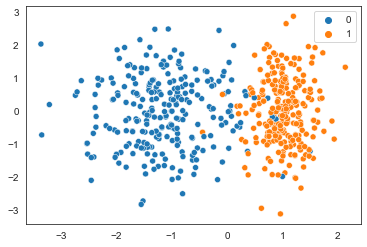

In [32]:
sns.set_style('white')
sns.scatterplot(X[:,0], X[:,1], hue=y.reshape(-1));

In [35]:
epsilon = 1e-8
y_pred = sigmoid(X @ W.T + b)
lss = -(y * np.log(y_pred + epsilon) + (1 - y) * np.log(1 - y_pred + epsilon))
print(f'{lss}')
cs = (1 / X.shape[0]) * np.sum(lss)
print(f'{cs=}')

[[0.01891352]
 [3.88321273]
 [3.64961295]
 [0.01585796]
 [3.62196191]
 [4.13342492]
 [0.01698971]
 [3.33818713]
 [0.01130164]
 [4.14746753]
 [3.66489037]
 [4.0852489 ]
 [0.01127345]
 [4.10110933]
 [3.73190646]
 [0.02223837]
 [3.51765631]
 [4.12643798]
 [0.01266177]
 [3.95315381]
 [0.01306981]
 [0.01190628]
 [0.01364954]
 [0.01600209]
 [0.0167935 ]
 [0.01979108]
 [0.02103964]
 [3.81346813]
 [4.01789799]
 [3.71589105]
 [0.02032808]
 [0.01655522]
 [0.01812429]
 [0.02099633]
 [3.68938546]
 [3.31475227]
 [0.01221147]
 [0.01533739]
 [0.01564788]
 [0.01143264]
 [3.89314233]
 [0.02082354]
 [3.84092314]
 [3.77947024]
 [0.01974634]
 [0.0142955 ]
 [0.01643396]
 [0.02567026]
 [3.58299573]
 [3.80202969]
 [0.0160423 ]
 [3.75847451]
 [0.01520101]
 [0.01261161]
 [4.0117035 ]
 [3.67941084]
 [0.01546252]
 [0.02401348]
 [0.01495097]
 [4.21745553]
 [0.01186982]
 [3.87286044]
 [3.9619825 ]
 [0.01976239]
 [4.22012437]
 [0.01734974]
 [4.17568484]
 [0.01388162]
 [4.04519497]
 [0.00966744]
 [4.03186015]
 [0.02

In [47]:
?? Linear

In [70]:
class Logistic(Linear):
    """Implementation of logistic regression model"""
    
    epsilon = 1e-8
    
    def __init__(self, W:np.ndarray, b:np.ndarray):
        super().__init__(W, b)
        
    @staticmethod
    def sigmoid(Z:np.ndarray) -> np.ndarray:
        return 1 / (1 + np.exp(-Z))
        
    def forward(self, X:np.ndarray) -> np.ndarray:
        return self.sigmoid(super().forward(X))
    
    def loss(self, X:np.ndarray, y:np.ndarray) -> np.ndarray:
        y_pred = self.forward(X)
        lss = -(y * np.log(y_pred + self.epsilon) + (1 - y) * np.log(1 - y_pred + self.epsilon))
        
        return lss
    
    def gradient(self, X:np.ndarray, y:np.ndarray) -> np.ndarray:
        lss = self.loss(X, y)
        coef = 1.0 / X.shape[0]
        self.dl_W = coef * np.sum(X * lss, axis=0)
        self.dl_b = coef * np.sum(lss, axis=0)
    
        return self.dl_W, self.dl_b
        

    def cost(self, X:np.ndarray, y:np.ndarray) -> float:
        lss = self.loss(X, y)
        cs = (1.0 / X.shape[0]) * np.sum(lss)
    
        return cs

In [71]:
W_init = np.zeros((1, X.shape[1]))
b_init = 0.0
W_init

array([[0., 0.]])

In [72]:
model = Logistic(W_init, b_init)
trainer = Trainer(model, lr=0.00001, n_iters=200000, tl=10000)
cs, y_preds = trainer.fit(X, y)

Gradients self.model.grad_W=array([0.04150851, 0.02414871]), self.model.grad_b=array([-0.69314716])
Interation 0 cost = 0.6931471605599454
Gradients self.model.grad_W=array([0.07986004, 0.02516041]), self.model.grad_b=array([-0.69757472])
Interation 10000 cost = 0.6975747165377715
Gradients self.model.grad_W=array([0.11988169, 0.02638796]), self.model.grad_b=array([-0.70538028])
Interation 20000 cost = 0.7053802777739874
Gradients self.model.grad_W=array([0.16216103, 0.02785816]), self.model.grad_b=array([-0.7167761])
Interation 30000 cost = 0.7167761040147075
Gradients self.model.grad_W=array([0.20736098, 0.02960387]), self.model.grad_b=array([-0.7320538])
Interation 40000 cost = 0.7320537987201864
Gradients self.model.grad_W=array([0.25623928, 0.03166492]), self.model.grad_b=array([-0.7515953])
Interation 50000 cost = 0.7515952950503965
Gradients self.model.grad_W=array([0.30967024, 0.03408911]), self.model.grad_b=array([-0.77588637])
Interation 60000 cost = 0.7758863722825877
Gradie

In [74]:
y_preds, cs = cs, y_preds

cs.shape=(200000,)


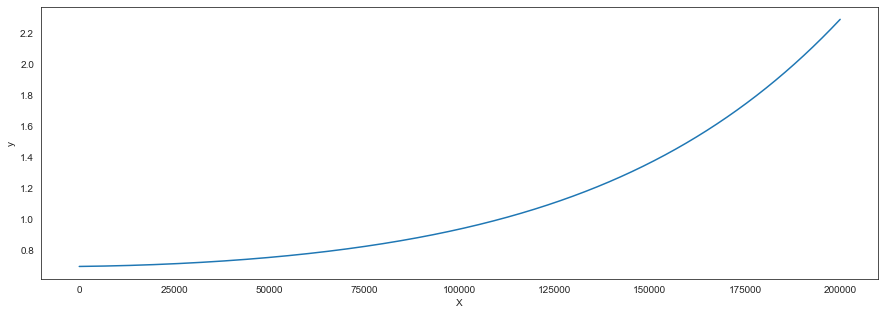

In [75]:
cs = np.array(cs, dtype=float)
print(f'{cs.shape=}')
plot_data(cs)

## Thank you

## Questions

<img src="images/intro2/questions_2.jpg" height="800" width="800">

## Thank you